In [1]:
import numpy as np 
import pandas as pd 
import re # this is the regular expression library which helps us manipulate text (strings) fairly easily and intuitively
import nltk # this is the Natural Language Tool Kit which contains a lot of functionalities for text analytics
import matplotlib.pyplot as plt
import string # this is used for string manipulations
import matplotlib

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pavithra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
## Let us check the version of the various libraries
print('Numpy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('Regular Expression version:',re.__version__)
print('Natural Language Tool Kit version:',nltk.__version__)
print('Matplotlib version:',matplotlib.__version__)

Numpy version: 1.23.5
Pandas version: 1.5.3
Regular Expression version: 2.2.1
Natural Language Tool Kit version: 3.7
Matplotlib version: 3.7.0


In [4]:
speech=pd.read_excel("Project_Speech.xlsx")

In [5]:
speech.head()

,Name,Speech
0,Roosevelt,On each national day of inauguration since 178...
1,Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
2,Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


In [6]:
len(speech)

3

In [7]:
speech['word_count'] = speech['Speech'].apply(lambda x: len(str(x).split(" ")))
speech[['Speech','word_count']].head()

,Speech,word_count
0,On each national day of inauguration since 178...,1323
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1364
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1769


In [8]:
speech['char_count'] = speech['Speech'].str.len()
speech[['Speech','char_count']].head()

,Speech,char_count
0,On each national day of inauguration since 178...,7651
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7673
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",10106


In [9]:
speech['Speech'][0]

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\\n\\nIn Washington\\\'s day the task of the people was to create and weld together a nation.\\n\\nIn Lincoln\\\'s day the task of the people was to preserve that Nation from disruption from within.\\n\\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\\n\\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\\n\\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\\n\\nThere are men who doubt this. There are men who bel

In [10]:
len(speech['Speech'][0])

7651

In [11]:
import nltk

# Download the punkt tokenizer data (if not already downloaded)
nltk.download('punkt')

# Apply sent_tokenize to count sentences
speech['sentence_count'] = speech['Speech'].apply(lambda x: len(nltk.sent_tokenize(str(x))))

[nltk_data] Downloading package punkt to /Users/pavithra/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
speech[['Speech','sentence_count']].head()

,Speech,sentence_count
0,On each national day of inauguration since 178...,32
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",27
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",20


In [13]:
def avg_word(sentence):
    words = sentence.split() #splitting the words separately from the input taken
    return (sum(len(word) for word in words)/len(words)) # getting the average length of words in the each of the entries

speech['avg_word'] = speech['Speech'].apply(lambda x: avg_word(x))
speech[['Speech','avg_word']].head()

,Speech,avg_word
0,On each national day of inauguration since 178...,4.783825
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",4.626100
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",4.713397


In [14]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

speech['stopwords'] = speech['Speech'].apply(lambda x: len([x for x in x.split() if x in stop]))
speech[['Speech','stopwords']].head()

,Speech,stopwords
0,On each national day of inauguration since 178...,632
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",618
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",899


In [15]:
speech['hastags'] = speech['Speech'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
speech[['Speech','hastags']].head()

,Speech,hastags
0,On each national day of inauguration since 178...,0
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",0
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",0


In [16]:
speech['numerics'] =speech['Speech'].apply(lambda x: len(re.findall(r'[0-9]',x)))
speech[['Speech','numerics']].head()

,Speech,numerics
0,On each national day of inauguration since 178...,14
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",10


In [17]:
speech['UpperCase'] = speech['Speech'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
speech[['Speech','UpperCase']].head()

,Speech,UpperCase
0,On each national day of inauguration since 178...,1
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",5
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",13


In [18]:
speech['Speech'] = speech['Speech'].apply(lambda x: " ".join(x.lower() for x in x.split()))
speech['Speech'].head()

0    on each national day of inauguration since 178...
1    vice president johnson, mr. speaker, mr. chief...
2    mr. vice president, mr. speaker, mr. chief jus...
Name: Speech, dtype: object

In [19]:
speech['Speech'] = speech['Speech'].str.replace('[^\w\s]','')
speech['Speech'].head()

/var/folders/yq/z63tdr0j1q52c_hyw7dbw7p80000gn/T/ipykernel_7788/3670527504.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  speech['Speech'] = speech['Speech'].str.replace('[^\w\s]','')


0    on each national day of inauguration since 178...
1    vice president johnson mr speaker mr chief jus...
2    mr vice president mr speaker mr chief justice ...
Name: Speech, dtype: object

In [20]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
speech['Speech'] = speech['Speech'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
speech['Speech'][0]

'national day inauguration since 1789 people renewed sense dedication united statesnnin washingtons day task people create weld together nationnnin lincolns day task people preserve nation disruption withinnnin day task people save nation institutions disruption withoutnnto us come time midst swift happenings pause moment take stock recall place history rediscover may risk real peril inactionnnlives nations determined count years lifetime human spirit life man threescore years ten little little less life nation fullness measure livennthere men doubt men believe democracy form government frame life limited measured kind mystical artificial fate unexplained reason tyranny slavery become surging wave future freedom ebbing tidennbut americans know truenneight years ago life republic seemed frozen fatalistic terror proved true midst shock acted acted quickly boldly decisivelynnthese later years living years fruitful years people democracy brought us greater security hope better understandin

In [21]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

speech['stopwords'] = speech['Speech'].apply(lambda x: len([x for x in x.split() if x in stop]))
speech[['Speech','stopwords']].head()

,Speech,stopwords
0,national day inauguration since 1789 people re...,0
1,vice president johnson mr speaker mr chief jus...,0
2,mr vice president mr speaker mr chief justice ...,0


In [22]:
all_words=[i for i in ' '.join(speech['Speech']).split()]

In [23]:
words=pd.DataFrame(data=all_words, columns=['words'])

In [24]:
words.value_counts().head(10)

words     
us            45
new           26
let           25
america       20
peace         19
nation        19
world         18
nations       14
government    13
know          13
dtype: int64

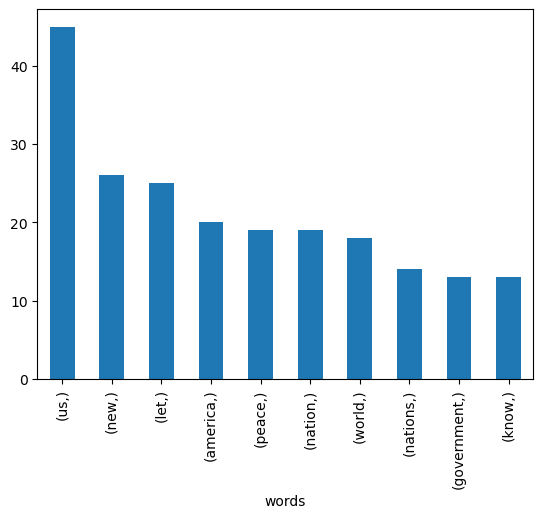

In [25]:
words.value_counts().head(10).plot.bar()
plt.show()

### Stemming -refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach

In [26]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
speech['Speech'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    nation day inaugur sinc 1789 peopl renew sens ...
1    vice presid johnson mr speaker mr chief justic...
2    mr vice presid mr speaker mr chief justic sena...
Name: Speech, dtype: object

In [27]:
speech['Speech'] = speech['Speech'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))


In [28]:
speech['Speech']

0    nation day inaugur sinc 1789 peopl renew sens ...
1    vice presid johnson mr speaker mr chief justic...
2    mr vice presid mr speaker mr chief justic sena...
Name: Speech, dtype: object

In [29]:
from nltk.corpus import stopwords
from collections import Counter

# Define a function to find the most common words in a text after removing stopwords
def most_common_words(text):
    stop_words = set(stopwords.words("english"))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    word_count = Counter(filtered_words)
    top_words = word_count.most_common(3)
    return top_words

# Get the most common words for each president's speech
roosevelt_top_words = most_common_words(speech['Speech'][0])
kennedy_top_words = most_common_words(speech['Speech'][1])
nixon_top_words = most_common_words(speech['Speech'][2])

# Print the results
print("President Franklin D. Roosevelt 1941")
print(roosevelt_top_words)

print("\nPresident John F. Kennedy 1961")
print(kennedy_top_words)

print("\nPresident Richard Nixon 1973")
print(nixon_top_words)


President Franklin D. Roosevelt 1941
[('nation', 16), ('know', 10), ('peopl', 8)]

President John F. Kennedy 1961
[('let', 11), ('us', 11), ('power', 9)]

President Richard Nixon 1973
[('us', 26), ('america', 19), ('respons', 16)]


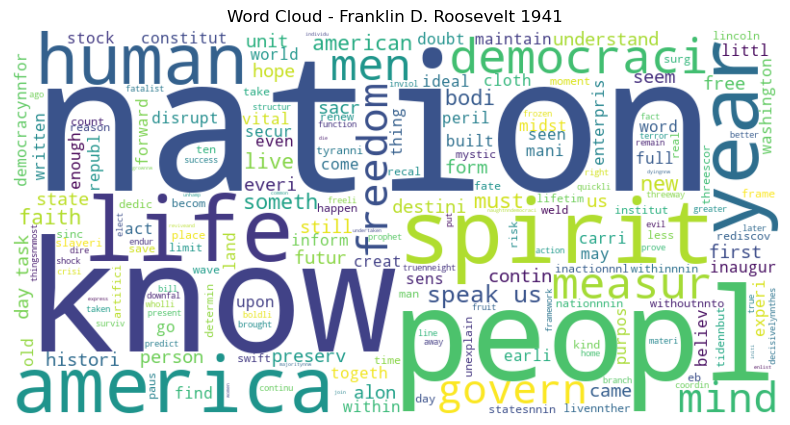

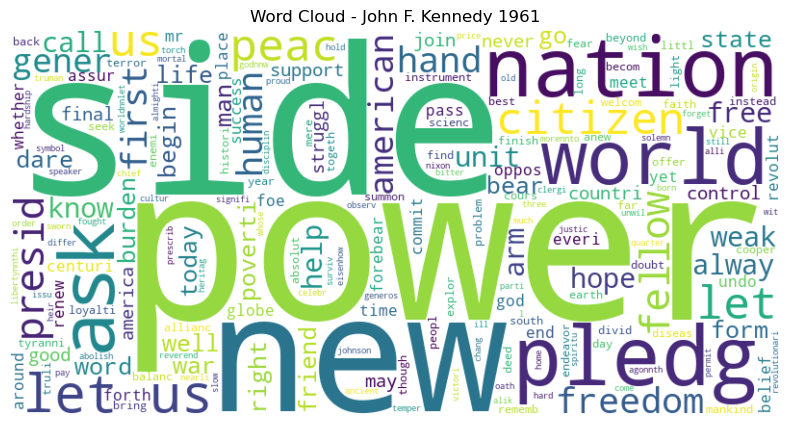

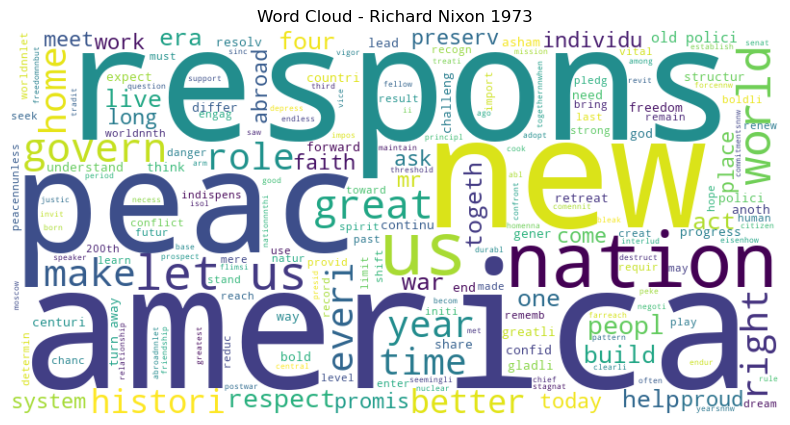

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to create and display a word cloud
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

# Create and display word clouds for each speech
for i, president in enumerate(['Franklin D. Roosevelt 1941', 'John F. Kennedy 1961', 'Richard Nixon 1973']):
    cleaned_speech = speech['Speech'][i]
    generate_word_cloud(cleaned_speech, f"Word Cloud - {president}")
